# Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

In [304]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.linear_model import LinearRegression
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
import numpy as np
# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [9]:
df=pd.read_csv('cubic_zirconia.csv').drop('Unnamed: 0',axis=1)

In [10]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [11]:
df.shape

(26967, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [14]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [15]:
df.duplicated().sum()

34

In [16]:
df.drop_duplicates(inplace=True)

In [83]:
df.drop(df[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))].index, inplace=True)

In [84]:
df.shape

(26925, 10)

In [18]:
df['depth'].fillna(df['depth'].mean(), inplace=True)

In [85]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [19]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [20]:
df.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.034741,0.181539,0.976858,0.941442,0.940982,0.922409
depth,0.034741,1.000000,-0.293720,-0.018145,-0.024139,0.097659,-0.002855
table,0.181539,-0.293720,1.000000,0.196254,0.182352,0.148994,0.126844
x,0.976858,-0.018145,0.196254,1.000000,0.962601,0.956490,0.886554
y,0.941442,-0.024139,0.182352,0.962601,1.000000,0.928725,0.856441
z,0.940982,0.097659,0.148994,0.956490,0.928725,1.000000,0.850682
price,0.922409,-0.002855,0.126844,0.886554,0.856441,0.850682,1.000000


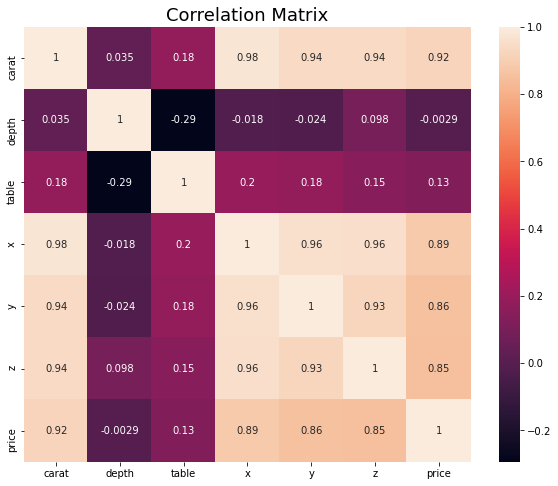

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Matrix",fontsize=18)
plt.show()

In [32]:
print(df['cut'].value_counts())
print(df['color'].value_counts())
print(df['clarity'].value_counts())

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64


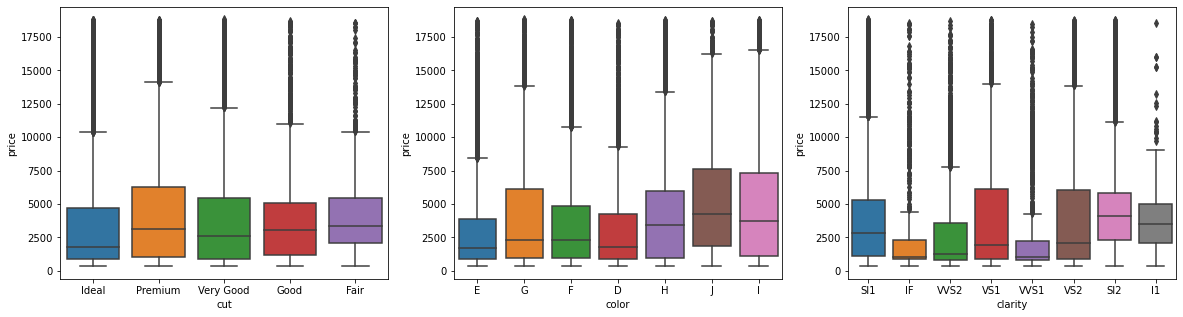

In [33]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.boxplot(df['cut'], df['price']);

plt.subplot(132)
sns.boxplot(df['color'], df['price']);

plt.subplot(133)
sns.boxplot(df['clarity'], df['price']);

In [87]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], color='g');
    plt.show()
    
    plt.figure()
    print("histplot of " + column)
    print("----------------------------------------------------------------------------")
    ax = plt.hist(x=df[column])
    plt.show()
    
    plt.figure()
    print("Boxplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.boxplot(df[column])
    plt.show()

In [88]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

7

Description of carat
----------------------------------------------------------------------------
count    26925.000000
mean         0.797821
std          0.477085
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64 Distribution of carat
----------------------------------------------------------------------------


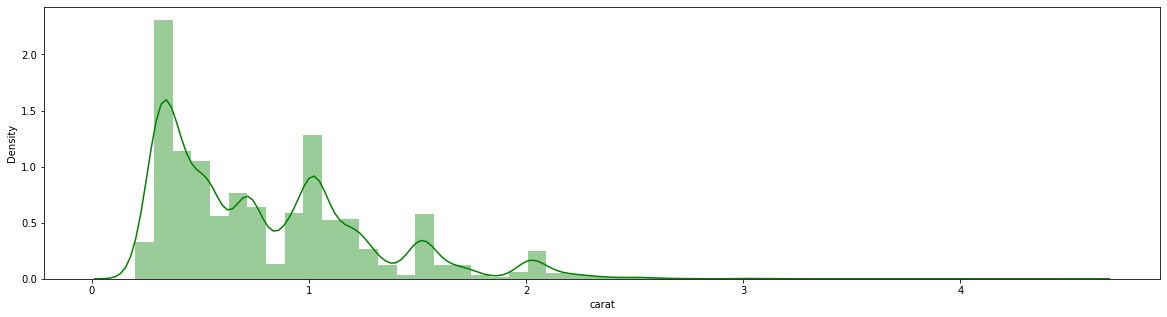

histplot of carat
----------------------------------------------------------------------------


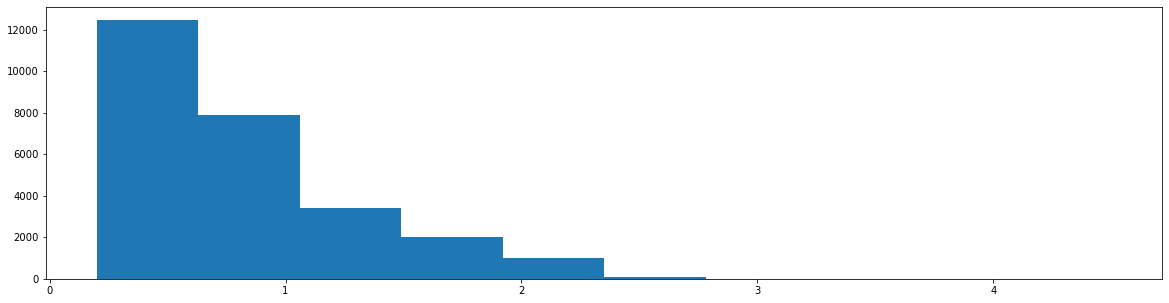

Boxplot of carat
----------------------------------------------------------------------------


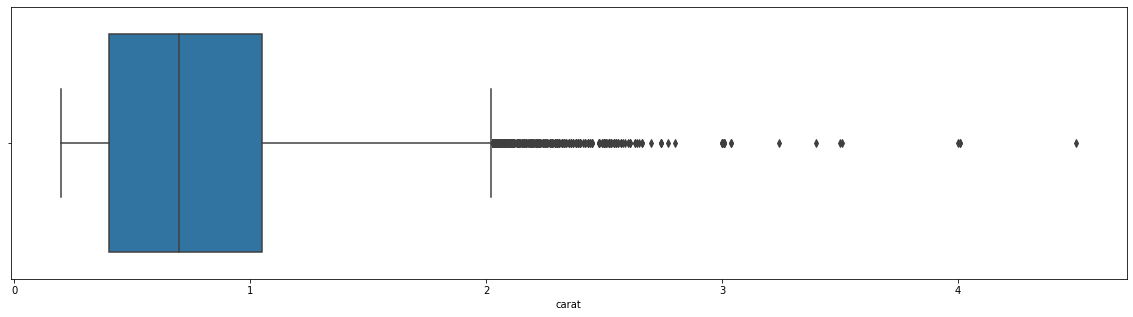

Description of depth
----------------------------------------------------------------------------
count    26925.000000
mean        61.745566
std          1.393430
min         50.800000
25%         61.100000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64 Distribution of depth
----------------------------------------------------------------------------


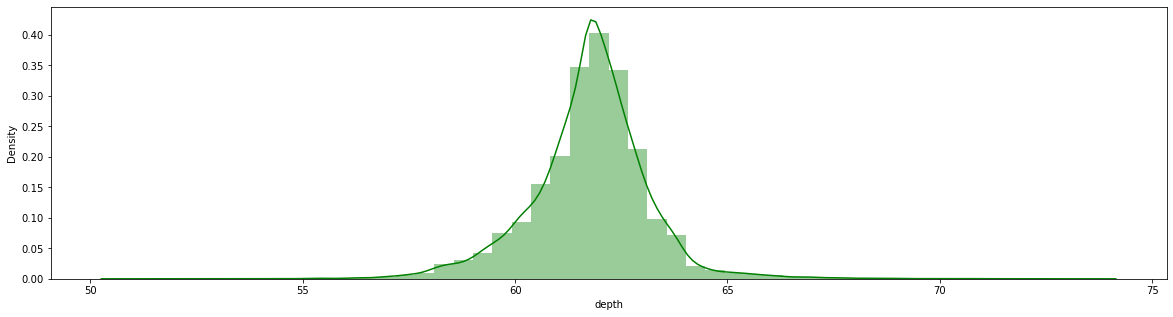

histplot of depth
----------------------------------------------------------------------------


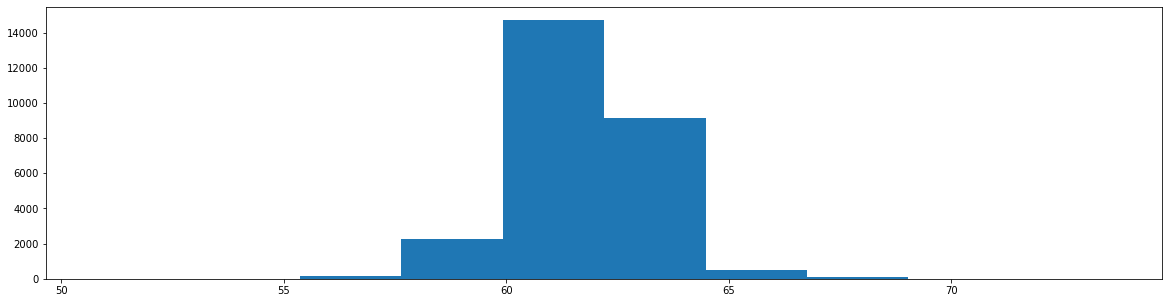

Boxplot of depth
----------------------------------------------------------------------------


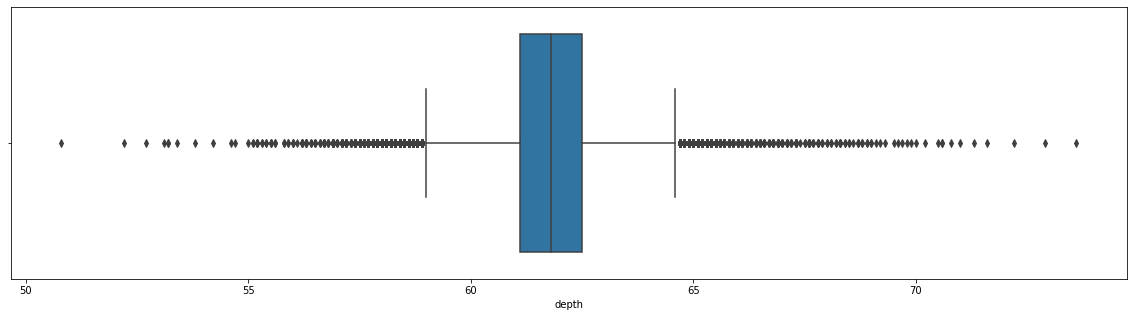

Description of table
----------------------------------------------------------------------------
count    26925.000000
mean        57.455305
std          2.231327
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64 Distribution of table
----------------------------------------------------------------------------


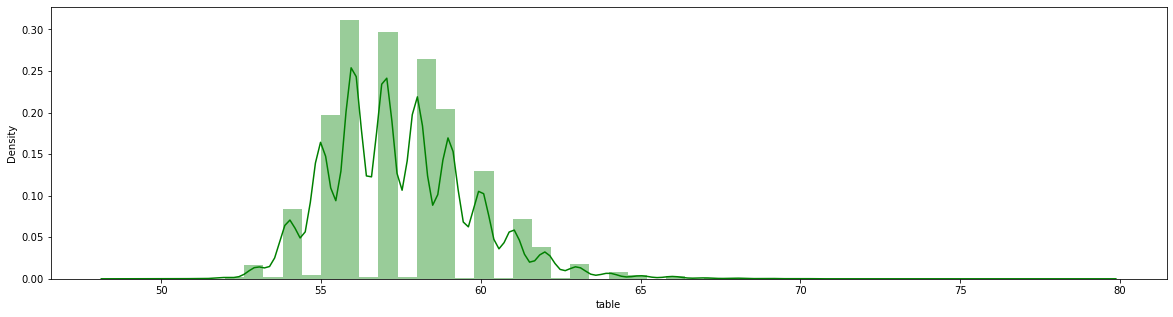

histplot of table
----------------------------------------------------------------------------


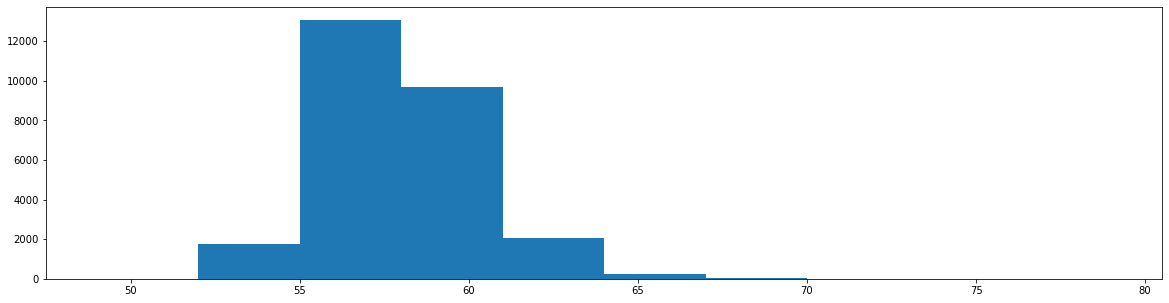

Boxplot of table
----------------------------------------------------------------------------


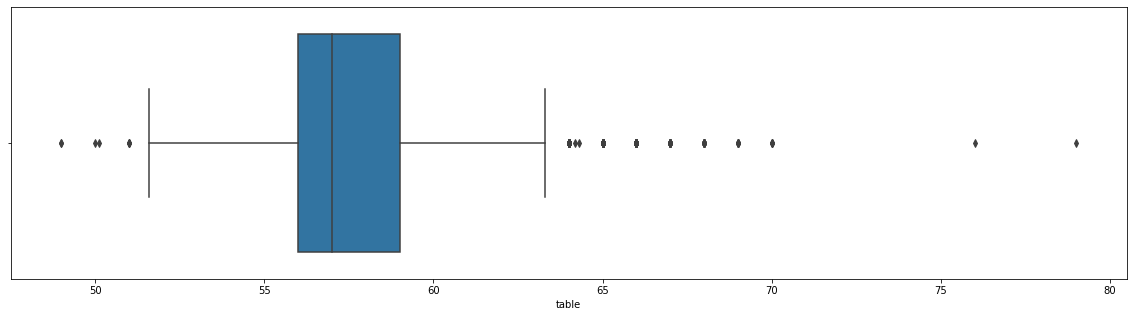

Description of x
----------------------------------------------------------------------------
count    26925.000000
mean         5.729385
std          1.126081
min          3.730000
25%          4.710000
50%          5.690000
75%          6.550000
max         10.230000
Name: x, dtype: float64 Distribution of x
----------------------------------------------------------------------------


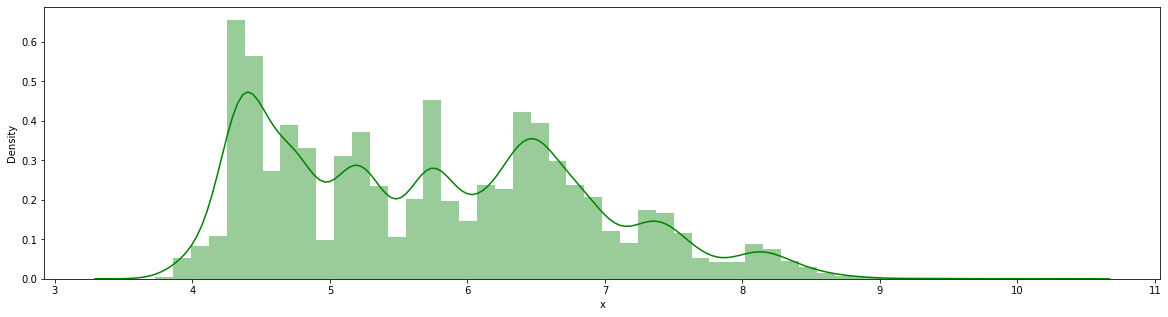

histplot of x
----------------------------------------------------------------------------


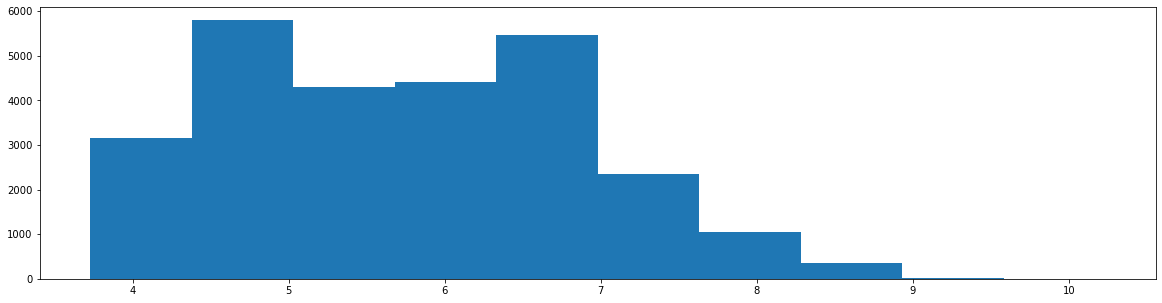

Boxplot of x
----------------------------------------------------------------------------


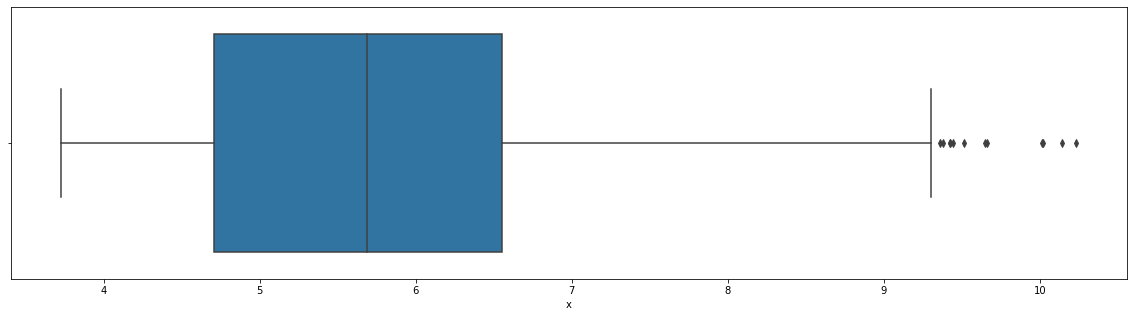

Description of y
----------------------------------------------------------------------------
count    26925.000000
mean         5.733152
std          1.163820
min          3.710000
25%          4.710000
50%          5.700000
75%          6.540000
max         58.900000
Name: y, dtype: float64 Distribution of y
----------------------------------------------------------------------------


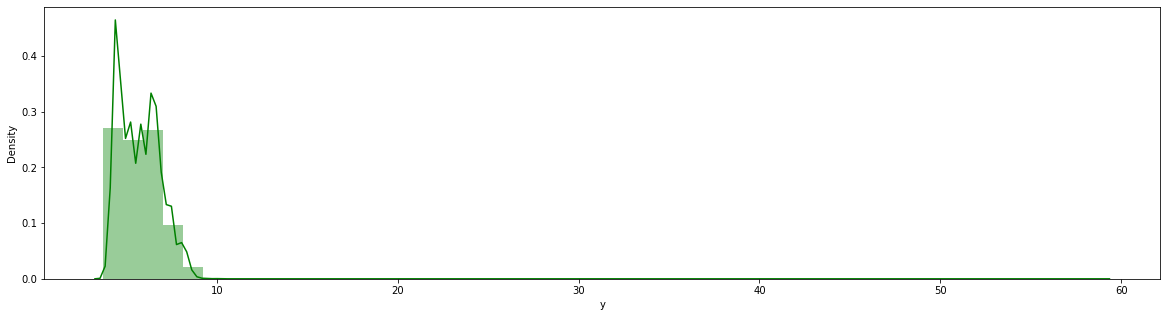

histplot of y
----------------------------------------------------------------------------


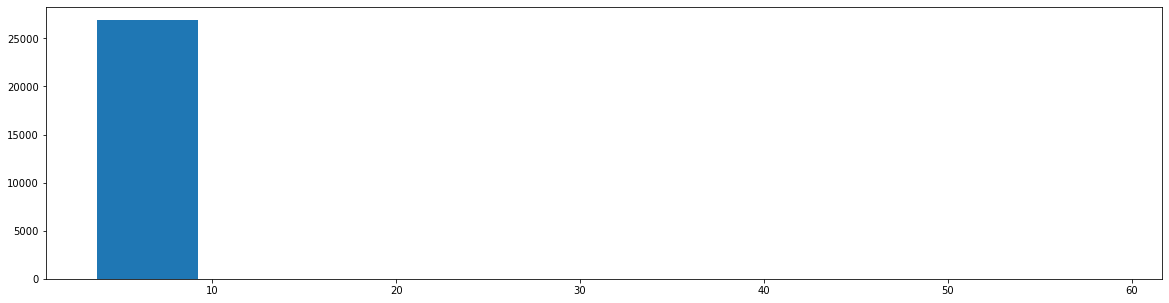

Boxplot of y
----------------------------------------------------------------------------


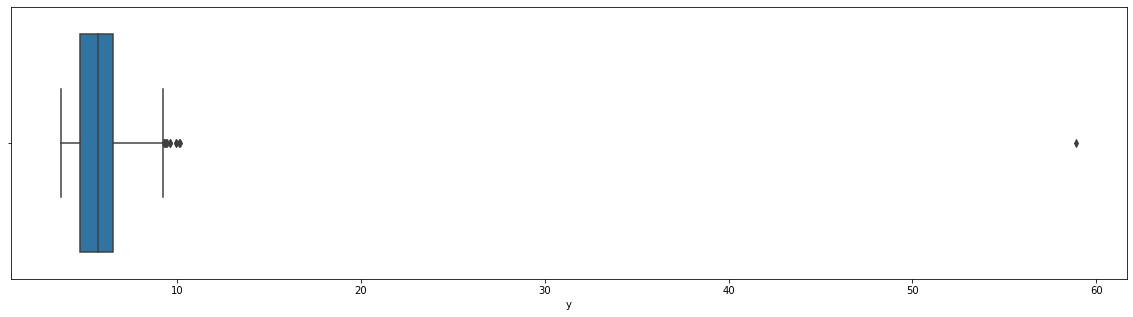

Description of z
----------------------------------------------------------------------------
count    26925.000000
mean         3.538820
std          0.717483
min          1.070000
25%          2.900000
50%          3.520000
75%          4.040000
max         31.800000
Name: z, dtype: float64 Distribution of z
----------------------------------------------------------------------------


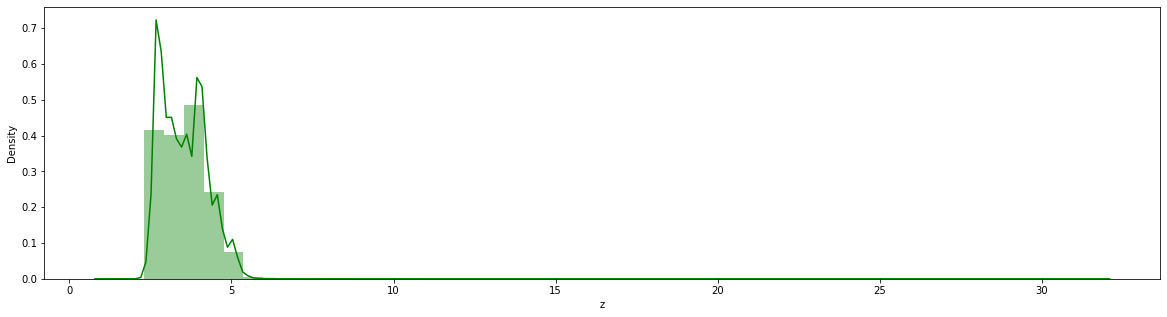

histplot of z
----------------------------------------------------------------------------


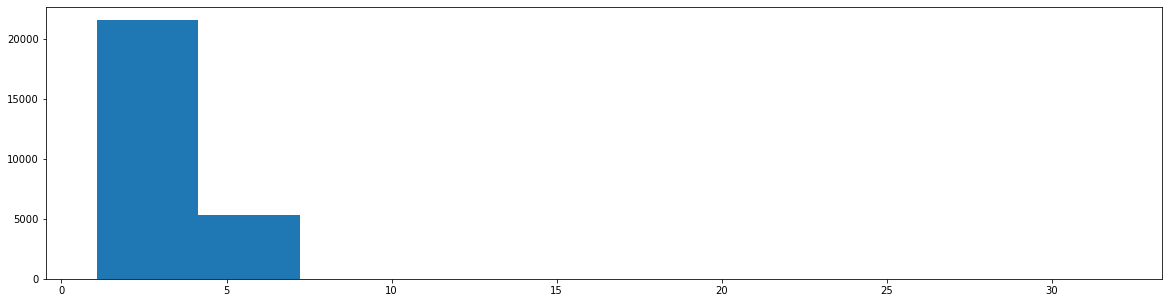

Boxplot of z
----------------------------------------------------------------------------


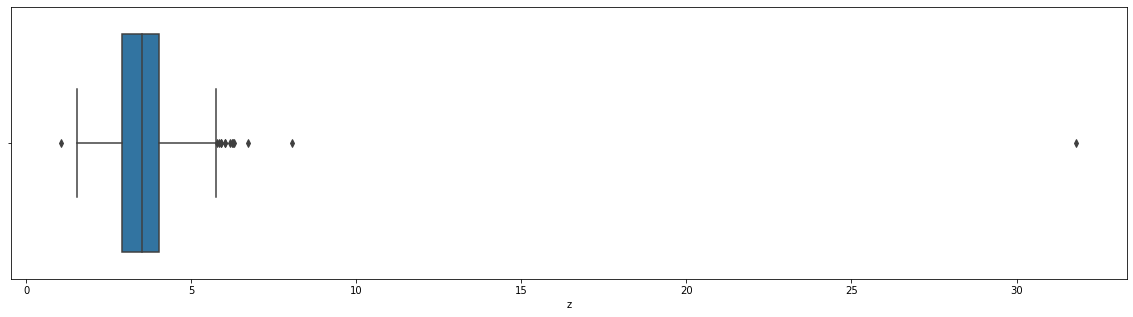

Description of price
----------------------------------------------------------------------------
count    26925.000000
mean      3936.249991
std       4020.983187
min        326.000000
25%        945.000000
50%       2373.000000
75%       5353.000000
max      18818.000000
Name: price, dtype: float64 Distribution of price
----------------------------------------------------------------------------


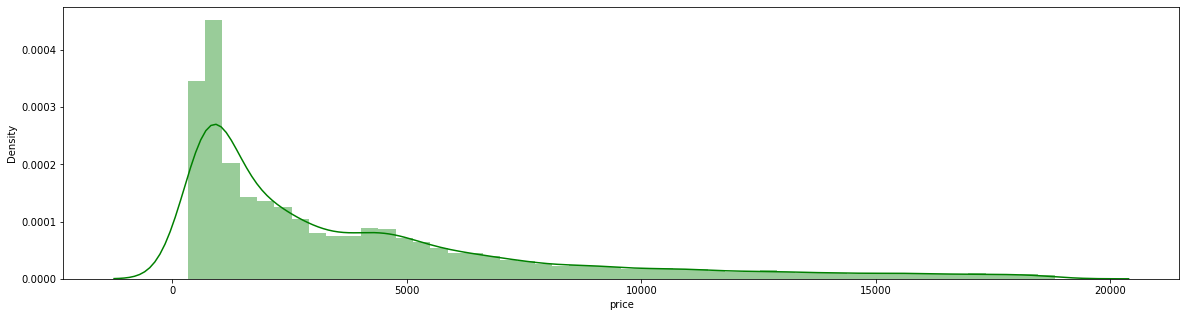

histplot of price
----------------------------------------------------------------------------


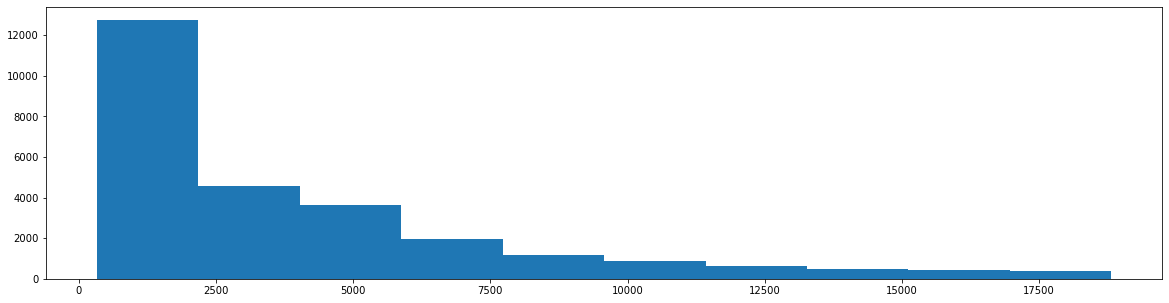

Boxplot of price
----------------------------------------------------------------------------


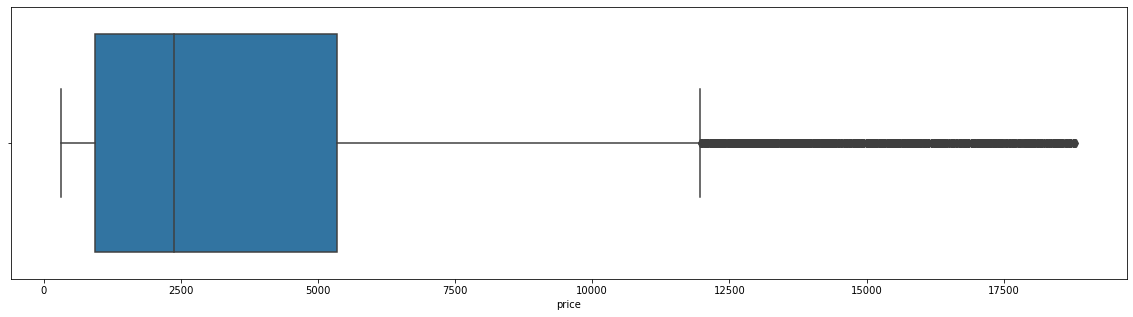

price


In [91]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)
print(x)

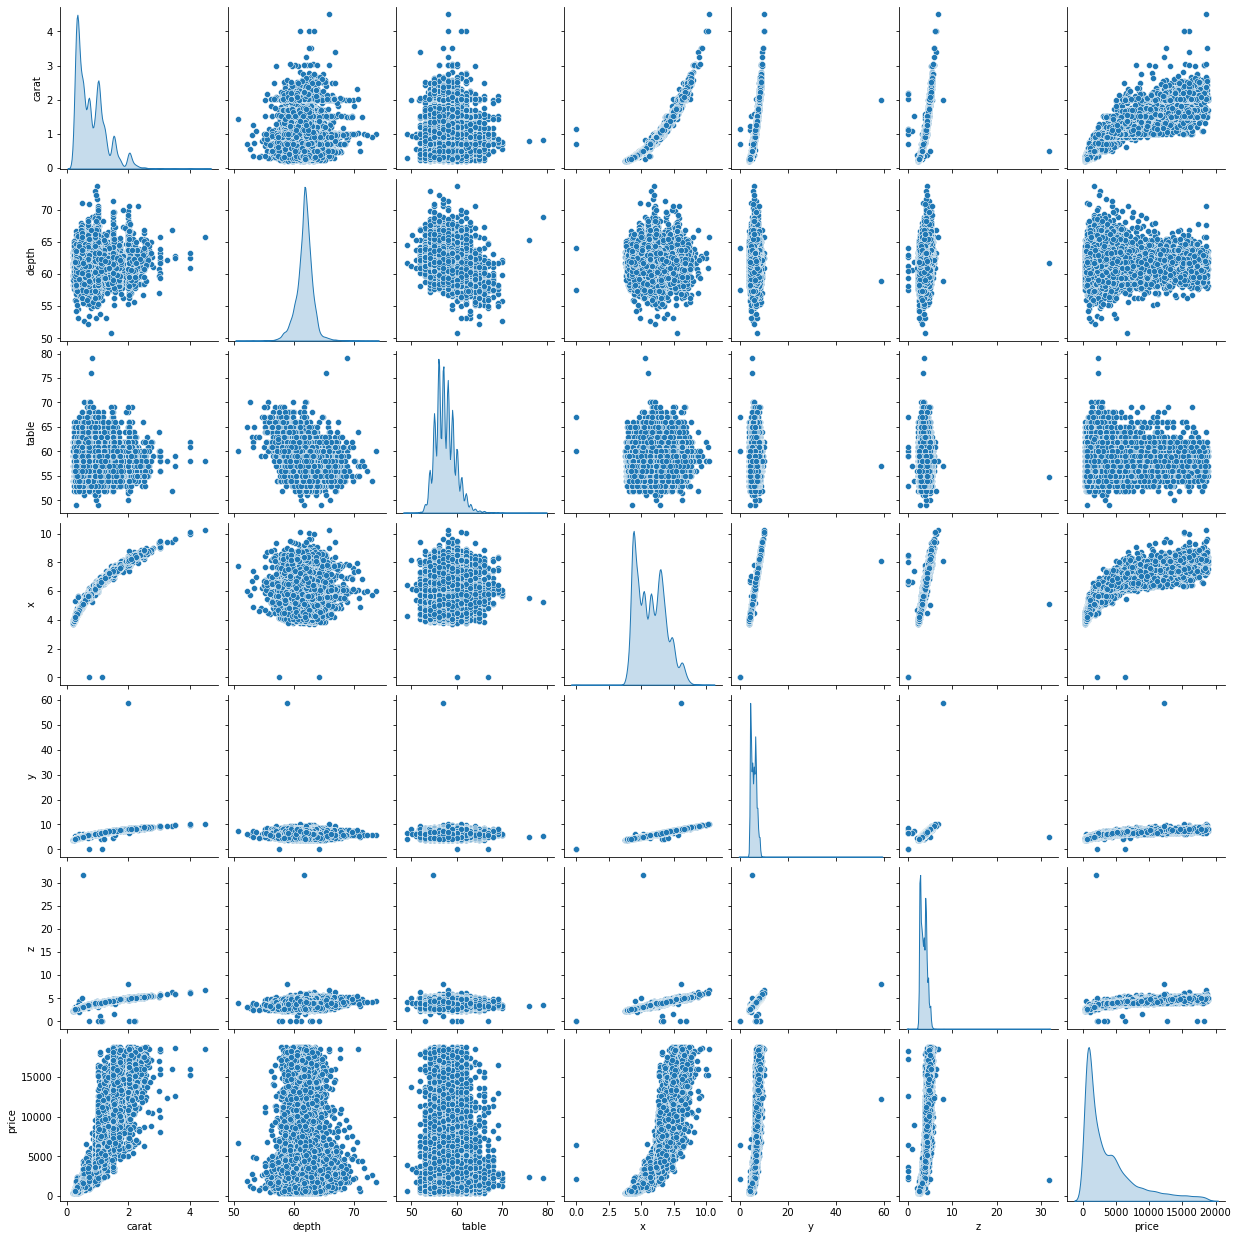

In [44]:
sns.pairplot(df,diag_kind='kde');

In [96]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [109]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool') & (df.dtypes!='object')].index
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

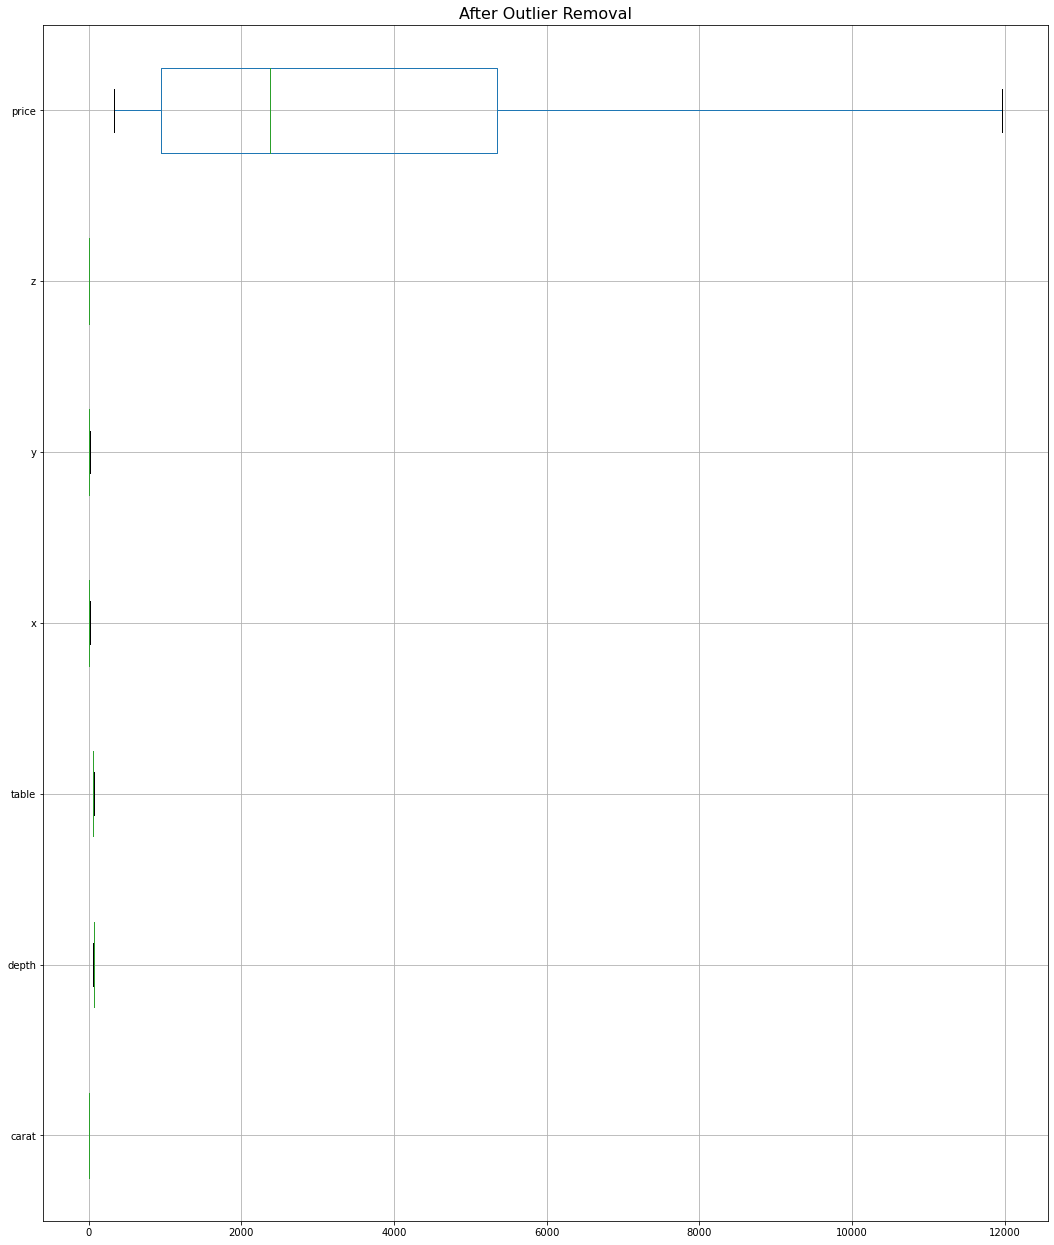

In [130]:
plt.figure(figsize=(18,22))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [149]:
data = pd.get_dummies(df, columns=['cut','color','clarity'],drop_first=True)

In [150]:
data

,carat,depth,table,x,y,z,price,cut_s,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,3,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09,5408.0,4,0,0,...,0,0,0,0,1,0,0,0,0,0
26963,0.33,61.9,55.0,4.44,4.42,2.74,1114.0,1,0,1,...,1,0,0,1,0,0,0,0,0,0
26964,0.51,61.7,58.0,5.12,5.15,3.17,1656.0,4,0,0,...,0,0,0,0,0,0,0,1,0,0
26965,0.27,61.8,56.0,4.19,4.20,2.60,682.0,3,0,0,...,0,0,0,0,0,0,0,0,0,1


In [148]:
df['cut_s'] = df['cut'].map({'Ideal':1,'Good':2,'Very Good':3,'Premium':4,'Fair':5})

In [167]:
sel_df = data[['carat','depth','table','x','y','z','cut_s','color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2','price']]

In [177]:
X = sel_df.drop('price', axis=1)
y = sel_df[['price']]

In [178]:
X.head()

,carat,depth,table,x,y,z,cut_s,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,1,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,4,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,3,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,1,0,1,0,0,0,0,0,0,0,0,0,1,0


In [179]:
y.head()

,price
0,499.0
1,984.0
2,6289.0
3,1082.0
4,779.0


In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [181]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)


In [182]:

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [183]:
for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.228621083165277
The coefficient for depth is -0.007336225818279822
The coefficient for table is -0.022768767324653324
The coefficient for x is -0.30886916739918935
The coefficient for y is 0.2835098321256157
The coefficient for z is -0.1411551383564001
The coefficient for cut_s is -0.01113987760172185
The coefficient for color_E is -0.021249878552174965
The coefficient for color_F is -0.025871705588154967
The coefficient for color_G is -0.04788042719311195
The coefficient for color_H is -0.0861509349156802
The coefficient for color_I is -0.1165827762268134
The coefficient for color_J is -0.12120217168650775
The coefficient for clarity_IF is 0.21385608296389036
The coefficient for clarity_SI1 is 0.3273078665488864
The coefficient for clarity_SI2 is 0.19496552253783994
The coefficient for clarity_VS1 is 0.3575997105148688
The coefficient for clarity_VS2 is 0.3820284064634963
The coefficient for clarity_VVS1 is 0.2804279214963234
The coefficient for clarity_

In [176]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -2.459574118873397e-16


In [184]:
# R square on training data
regression_model.score(X_train_scaled, y_train_scaled)

0.939647160332126

In [185]:
# R square on testing data
regression_model.score(X_test_scaled, y_test_scaled)

0.9405797803046235

In [186]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled,predicted_train))

0.24566814947785548

In [189]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_test_scaled, y_test_scaled).predict(X_test_scaled)
np.sqrt(metrics.mean_squared_error(y_test_scaled,predicted_test))

0.2424315854154021

##### Linear Regression using statsmodels

In [190]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train_scaled, y_train_scaled], axis=1)
data_test=pd.concat([X_test_scaled,y_test_scaled],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_s,color_E,color_F,color_G,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
5030,0.668077,1.270307,-0.660885,0.713451,0.760994,0.883039,-0.315068,2.112183,-0.461647,-0.515343,...,-0.338157,-0.23721,-0.187335,-0.571816,2.209601,-0.422786,-0.536719,-0.26846,-0.321643,0.097115
12108,0.472372,1.844501,-0.660885,0.508309,0.581385,0.753145,0.447006,-0.473444,-0.461647,-0.515343,...,-0.338157,-0.23721,-0.187335,-0.571816,2.209601,-0.422786,-0.536719,-0.26846,-0.321643,0.415485
20181,-0.266960,-0.862416,1.843240,-0.116038,-0.083170,-0.184973,-0.315068,-0.473444,-0.461647,-0.515343,...,2.957209,-0.23721,-0.187335,-0.571816,-0.452570,-0.422786,1.863172,-0.26846,-0.321643,-0.584445
4712,-0.071254,-2.256888,2.585202,0.285328,0.213186,-0.098378,-0.315068,-0.473444,-0.461647,1.940454,...,-0.338157,-0.23721,-0.187335,1.748815,-0.452570,-0.422786,-0.536719,-0.26846,-0.321643,-0.370752
2548,0.472372,0.860168,0.730295,0.570743,0.545463,0.652117,1.209080,-0.473444,-0.461647,1.940454,...,-0.338157,-0.23721,-0.187335,-0.571816,-0.452570,2.365264,-0.536719,-0.26846,-0.321643,0.835351


In [191]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_s', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [196]:
expr= 'price ~ carat + depth + table + x + y + z + cut_s + color_E + color_F +color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 +clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 +clarity_VVS2'

In [197]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept      -4.293441e-17
carat           1.228621e+00
depth          -7.336226e-03
table          -2.276877e-02
x              -3.088692e-01
y               2.835098e-01
z              -1.411551e-01
cut_s          -1.113988e-02
color_E        -2.124988e-02
color_F        -2.587171e-02
color_G        -4.788043e-02
color_H        -8.615093e-02
color_I        -1.165828e-01
color_J        -1.212022e-01
clarity_IF      2.138561e-01
clarity_SI1     3.273079e-01
clarity_SI2     1.949655e-01
clarity_VS1     3.575997e-01
clarity_VS2     3.820284e-01
clarity_VVS1    2.804279e-01
clarity_VVS2    3.252626e-01
dtype: float64

In [198]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.466e+04
Date:                Sun, 27 Mar 2022   Prob (F-statistic):               0.00
Time:                        01:48:33   Log-Likelihood:                -285.81
No. Observations:               18847   AIC:                             613.6
Df Residuals:                   18826   BIC:                             778.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4.293e-17      0.002   -2.4e-14   

In [200]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [201]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.245668149477856

In [203]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

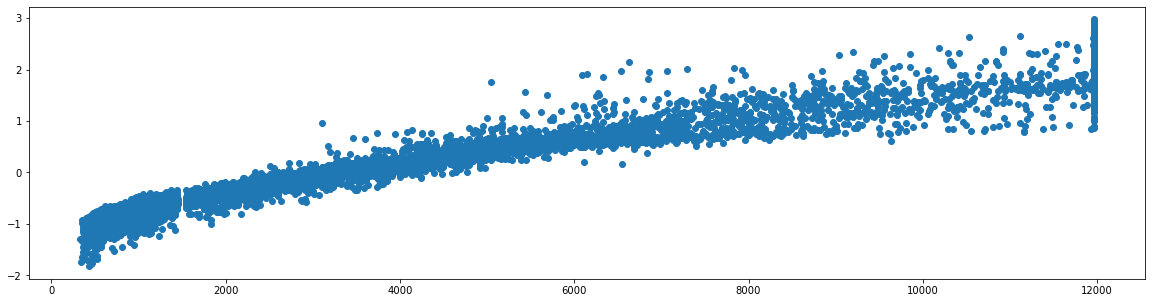

In [204]:
plt.scatter(y_test['price'], y_pred)
plt.show()

# Problem 2: Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.


In [47]:
holiday_df=pd.read_csv('Holiday_Package.csv').drop('Unnamed: 0',axis=1)

In [49]:
holiday_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [50]:
holiday_df.shape

(872, 7)

In [48]:
holiday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [52]:
holiday_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


In [51]:
holiday_df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [53]:
holiday_df.duplicated().sum()

0

In [210]:
holiday_df['Holliday_Package'].value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [211]:
holiday_df['foreign'].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

In [212]:
def univariateAnalysis(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(holiday_df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(holiday_df[column], color='g');
    plt.show()
    
    plt.figure()
    print("histplot of " + column)
    print("----------------------------------------------------------------------------")
    ax = plt.hist(x=holiday_df[column])
    plt.show()
    
    plt.figure()
    print("Boxplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.boxplot(holiday_df[column])
    plt.show()

In [213]:
df_number = holiday_df.select_dtypes(include = ['float64','int64'])
lstnumericcolumn = list(df_number.columns.values)
len(lstnumericcolumn)

5

Description of Salary
----------------------------------------------------------------------------
count       872.000000
mean      47729.172018
std       23418.668531
min        1322.000000
25%       35324.000000
50%       41903.500000
75%       53469.500000
max      236961.000000
Name: Salary, dtype: float64 Distribution of Salary
----------------------------------------------------------------------------


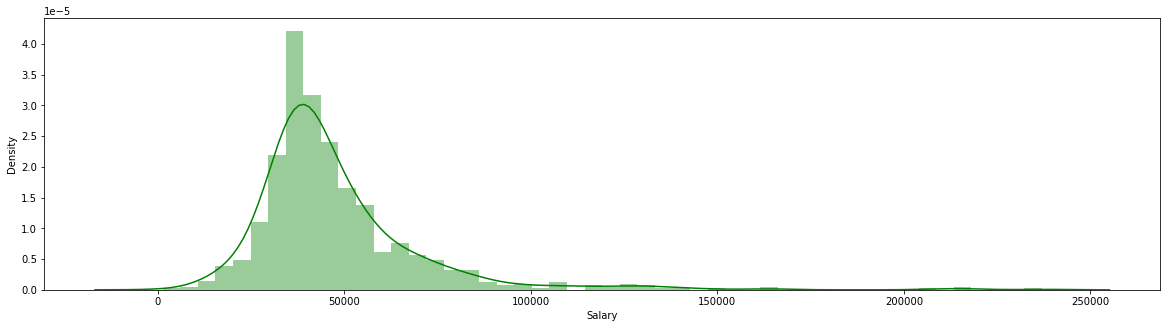

histplot of Salary
----------------------------------------------------------------------------


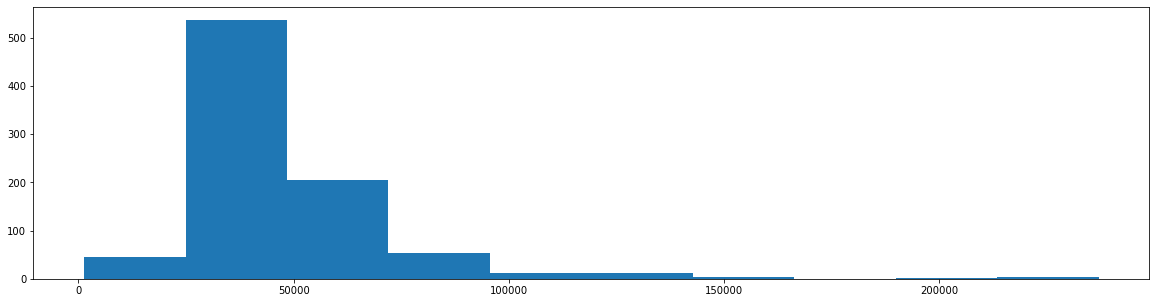

Boxplot of Salary
----------------------------------------------------------------------------


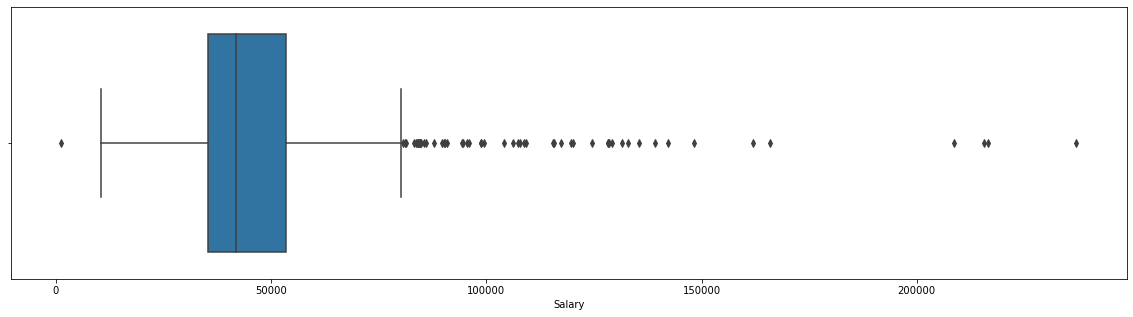

Description of age
----------------------------------------------------------------------------
count    872.000000
mean      39.955275
std       10.551675
min       20.000000
25%       32.000000
50%       39.000000
75%       48.000000
max       62.000000
Name: age, dtype: float64 Distribution of age
----------------------------------------------------------------------------


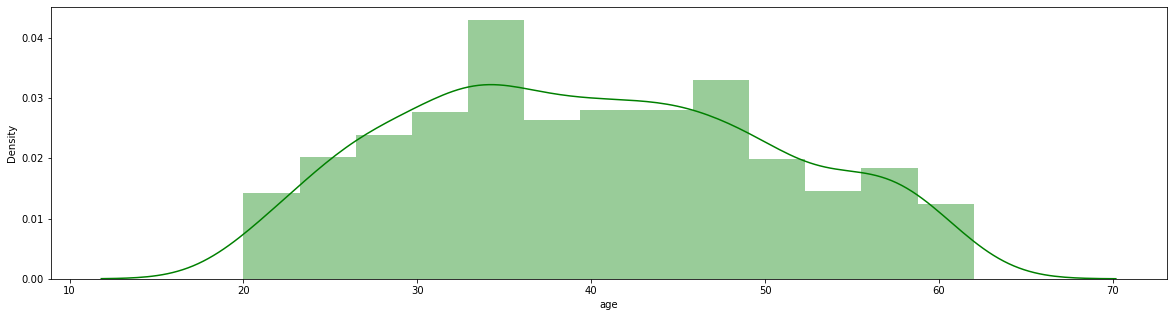

histplot of age
----------------------------------------------------------------------------


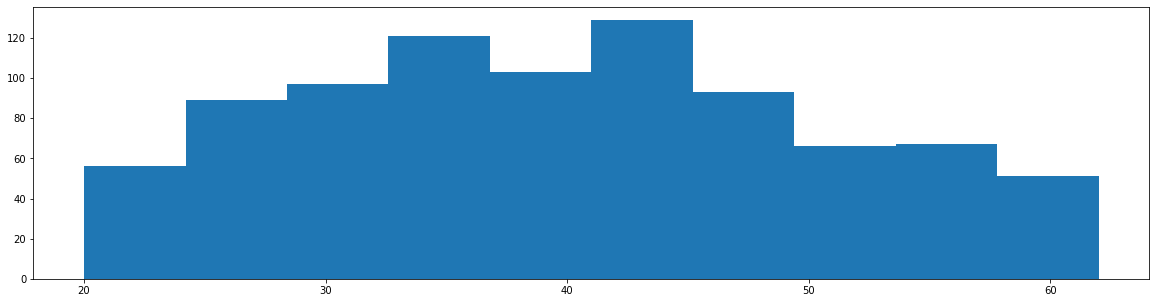

Boxplot of age
----------------------------------------------------------------------------


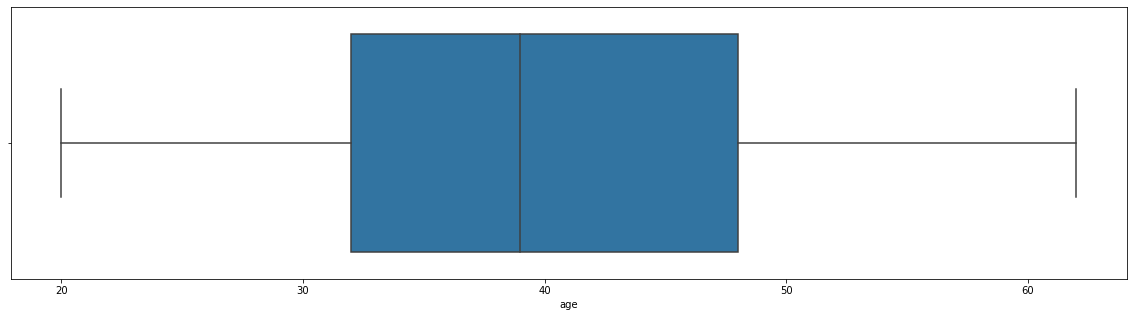

Description of educ
----------------------------------------------------------------------------
count    872.000000
mean       9.307339
std        3.036259
min        1.000000
25%        8.000000
50%        9.000000
75%       12.000000
max       21.000000
Name: educ, dtype: float64 Distribution of educ
----------------------------------------------------------------------------


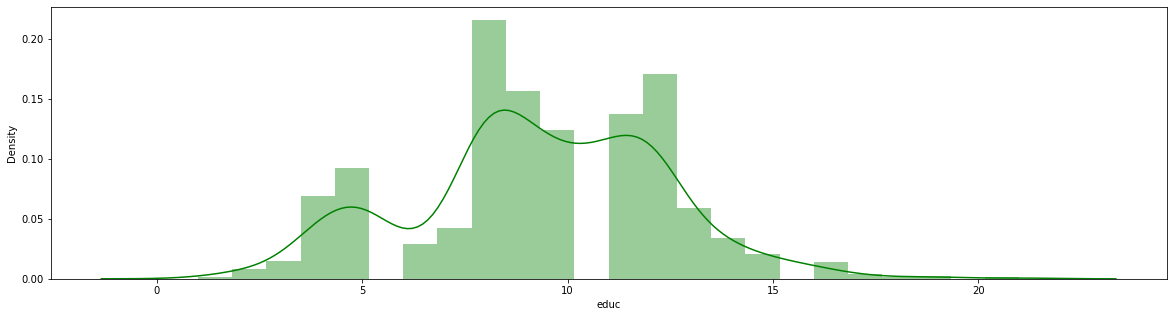

histplot of educ
----------------------------------------------------------------------------


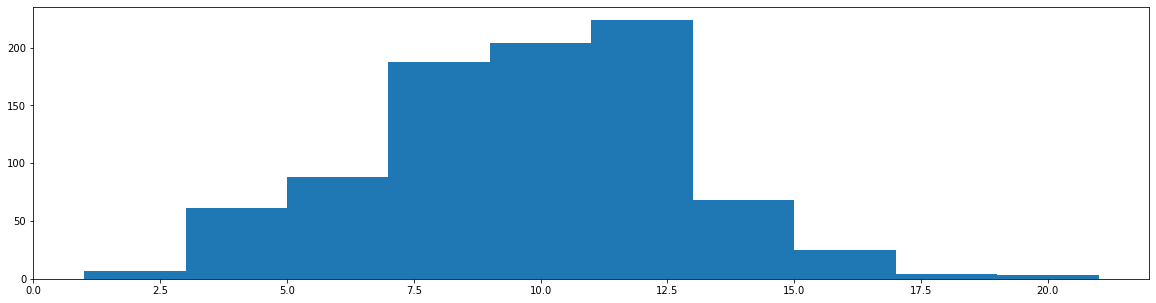

Boxplot of educ
----------------------------------------------------------------------------


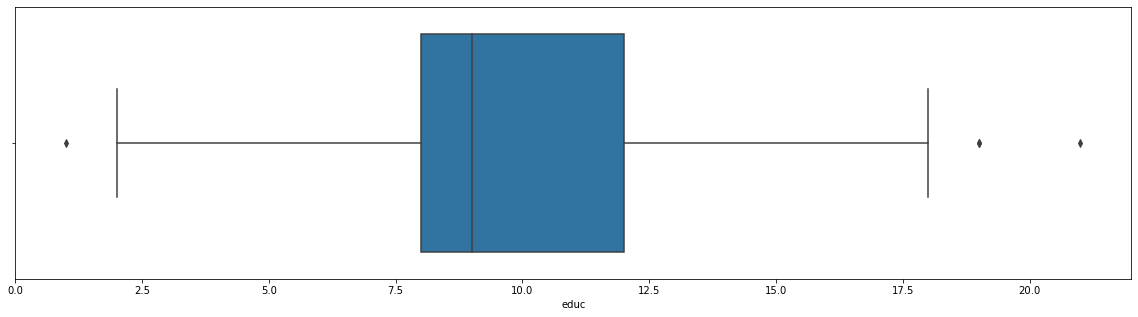

Description of no_young_children
----------------------------------------------------------------------------
count    872.000000
mean       0.311927
std        0.612870
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: no_young_children, dtype: float64 Distribution of no_young_children
----------------------------------------------------------------------------


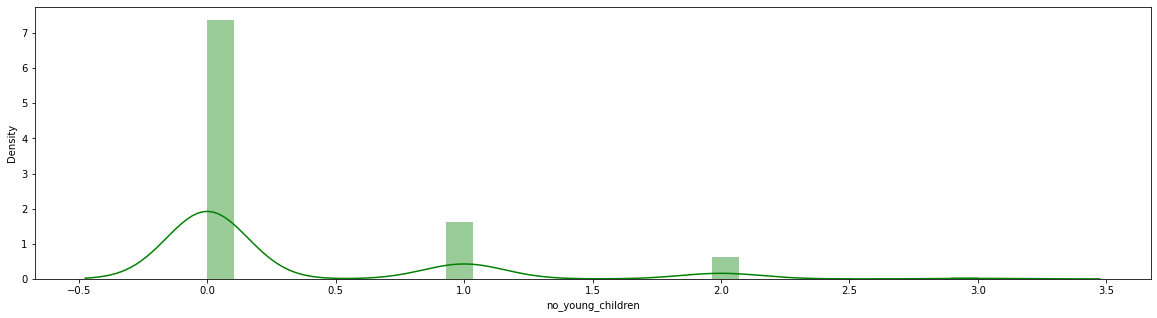

histplot of no_young_children
----------------------------------------------------------------------------


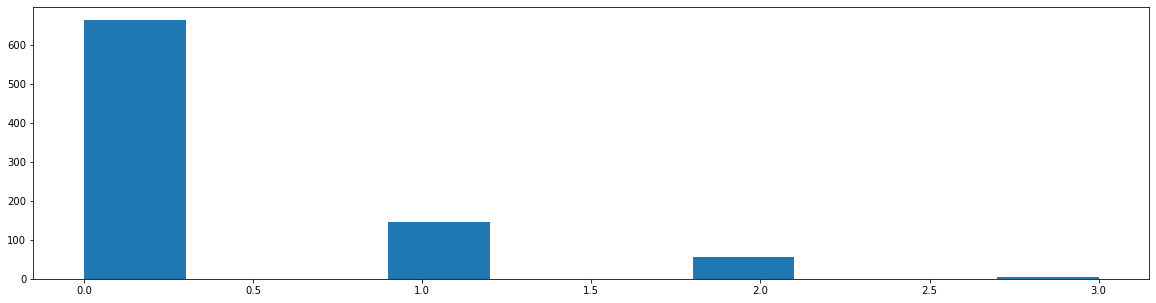

Boxplot of no_young_children
----------------------------------------------------------------------------


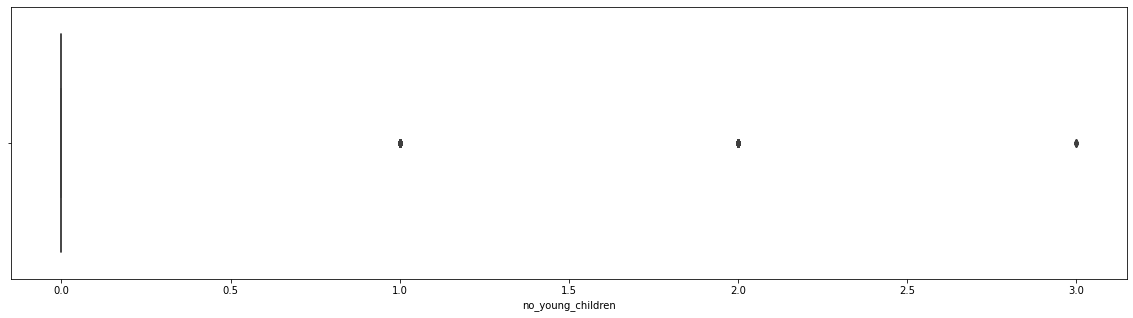

Description of no_older_children
----------------------------------------------------------------------------
count    872.000000
mean       0.982798
std        1.086786
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: no_older_children, dtype: float64 Distribution of no_older_children
----------------------------------------------------------------------------


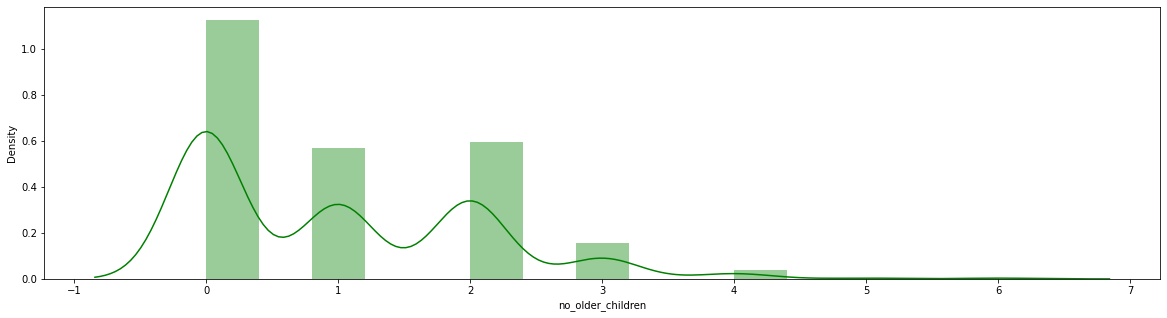

histplot of no_older_children
----------------------------------------------------------------------------


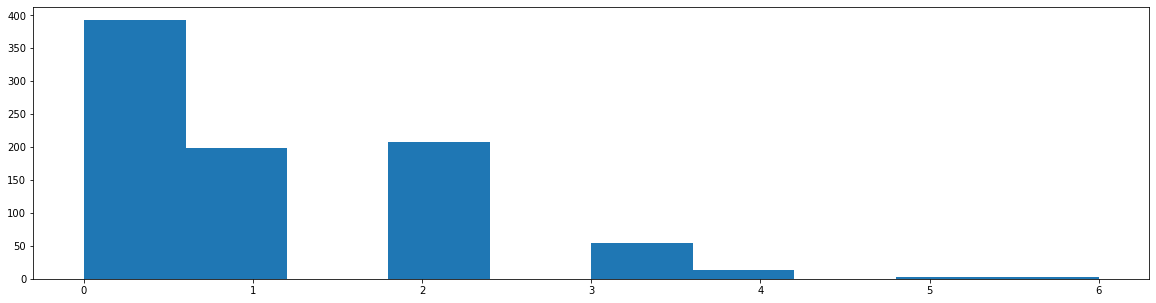

Boxplot of no_older_children
----------------------------------------------------------------------------


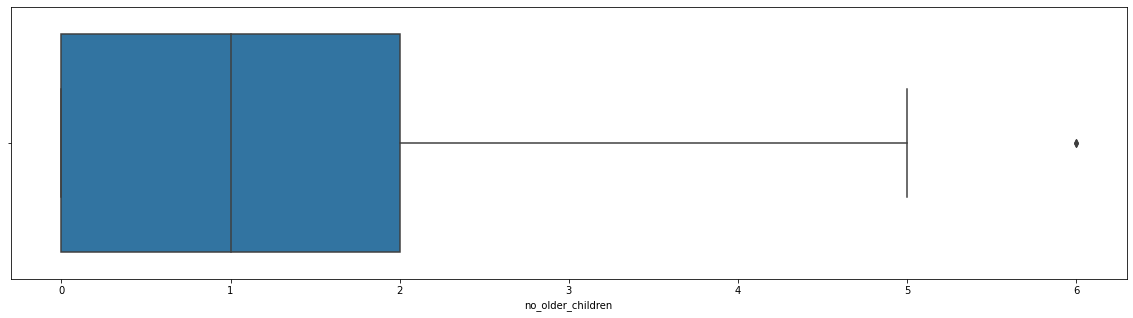

no_older_children


In [214]:
for x in lstnumericcolumn:
    univariateAnalysis(x,20)
print(x)

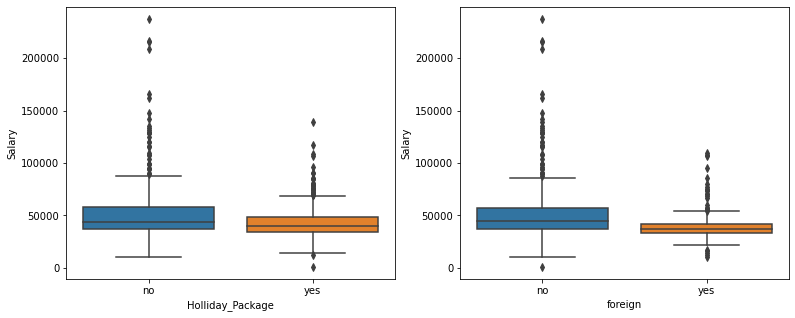

In [216]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.boxplot(holiday_df['Holliday_Package'], holiday_df['Salary']);

plt.subplot(132)
sns.boxplot(holiday_df['foreign'], holiday_df['Salary']);


In [217]:
holiday_df.corr()

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


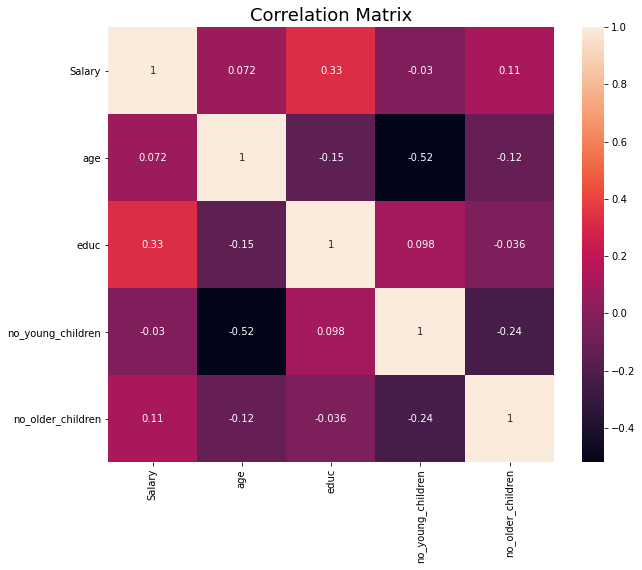

In [218]:
plt.figure(figsize=(10,8))
sns.heatmap(holiday_df.corr(),annot=True)
plt.title("Correlation Matrix",fontsize=18)
plt.show()

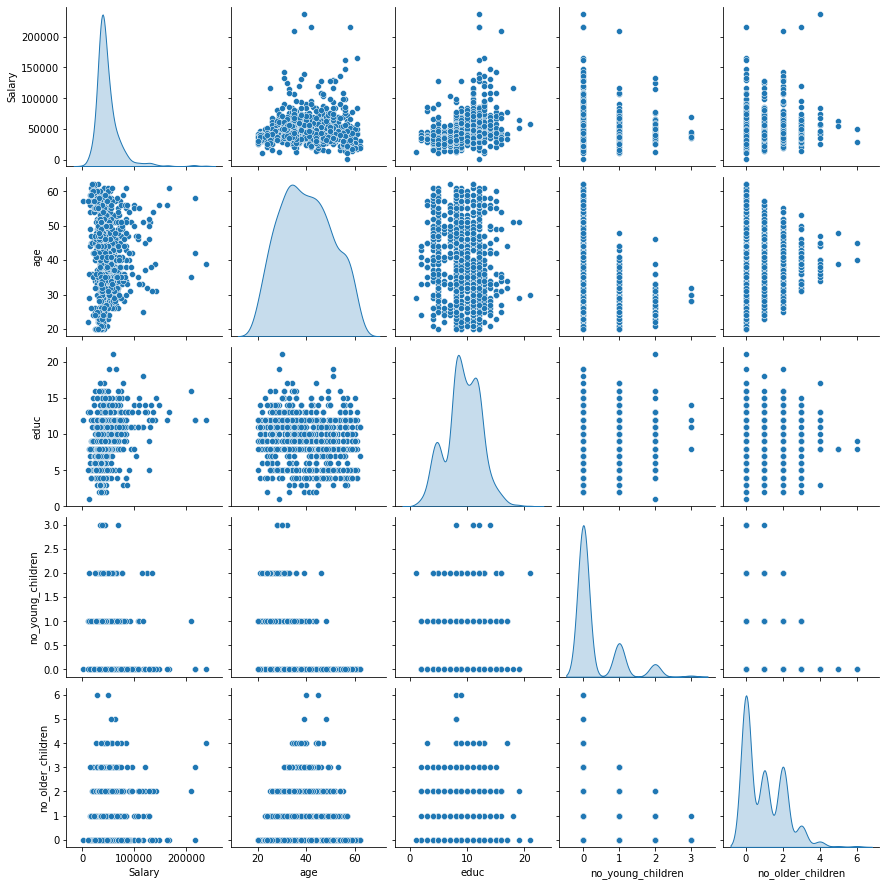

In [55]:
sns.pairplot(holiday_df,diag_kind='kde');

In [219]:
def remove_holiday_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [220]:
holi_cont=holiday_df.dtypes[(holiday_df.dtypes!='uint8') & (holiday_df.dtypes!='bool') & (holiday_df.dtypes!='object')].index
for column in holiday_df[holi_cont].columns:
    lr,ur=remove_holiday_outlier(holiday_df[column])
    holiday_df[column]=np.where(holiday_df[column]>ur,ur,holiday_df[column])
    holiday_df[column]=np.where(holiday_df[column]<lr,lr,holiday_df[column])

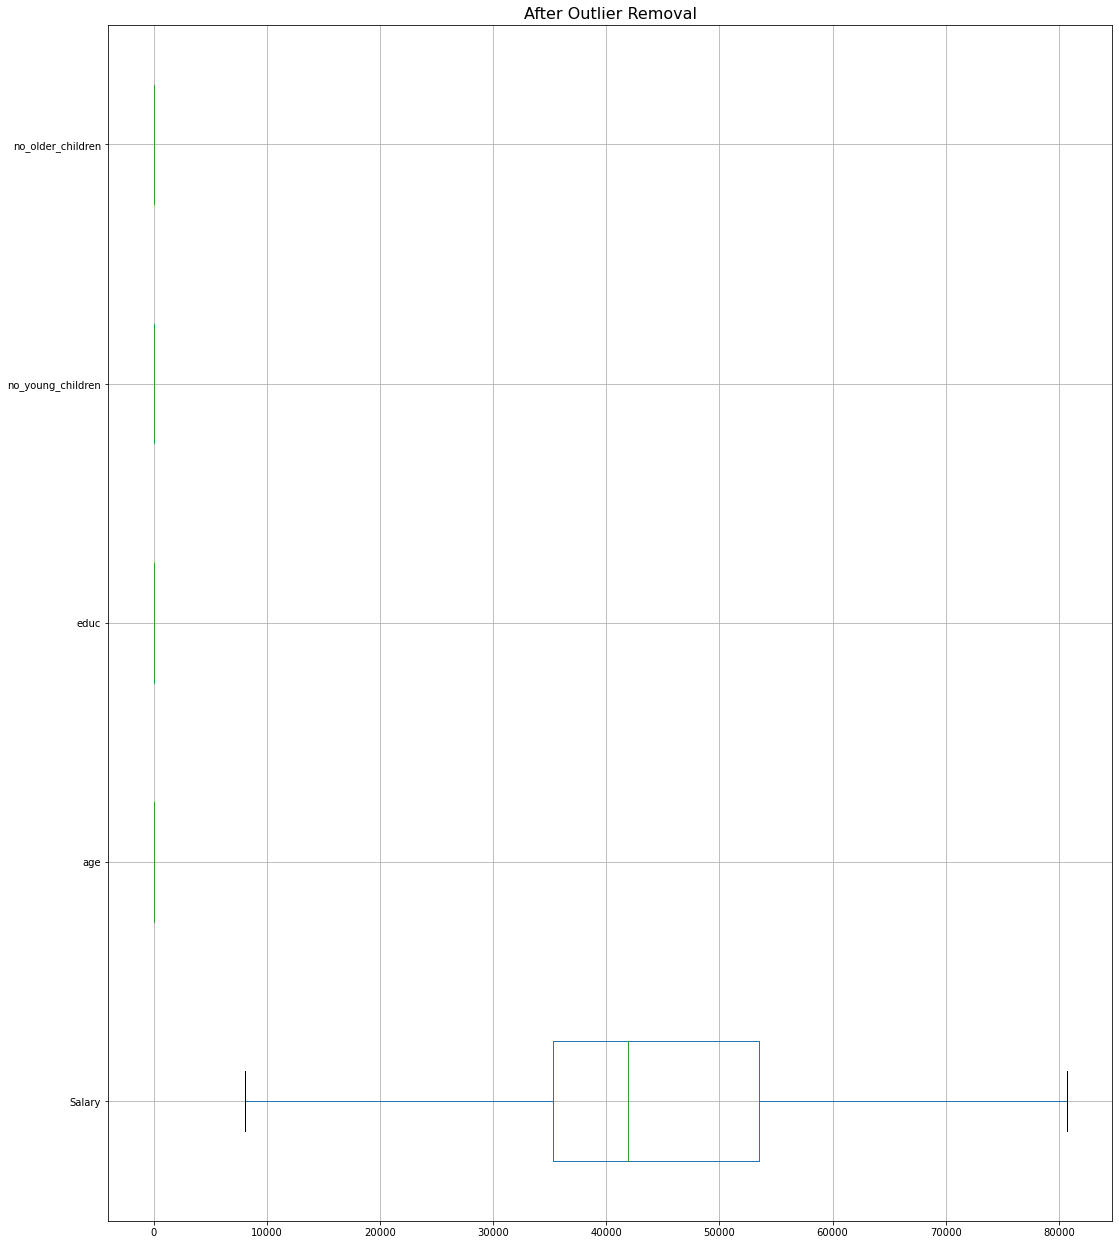

In [221]:
plt.figure(figsize=(18,22))
holiday_df[holi_cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [222]:
holiday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    object 
 1   Salary             872 non-null    float64
 2   age                872 non-null    float64
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    float64
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    object 
dtypes: float64(5), object(2)
memory usage: 47.8+ KB


In [223]:
holiday_df_dummy = pd.get_dummies(holiday_df,drop_first=True)
holiday_df_dummy.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412.0,30.0,8.0,0.0,1.0,0,0
1,37207.0,45.0,8.0,0.0,1.0,1,0
2,58022.0,46.0,9.0,0.0,0.0,0,0
3,66503.0,31.0,11.0,0.0,0.0,0,0
4,66734.0,44.0,12.0,0.0,2.0,0,0


In [224]:
X = holiday_df_dummy.drop('Holliday_Package_yes', axis=1)

# Copy target into the y dataframe. 
y = holiday_df_dummy['Holliday_Package_yes']

In [254]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=holiday_df_dummy['Holliday_Package_yes'])

In [255]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package_yes, dtype: float64

In [256]:
y_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package_yes, dtype: float64

In [257]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    4.6s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [258]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [259]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.640764,0.359236
1,0.569909,0.430091
2,0.655265,0.344735
3,0.564147,0.435853
4,0.538869,0.461131


In [260]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6344262295081967

AUC: 0.661


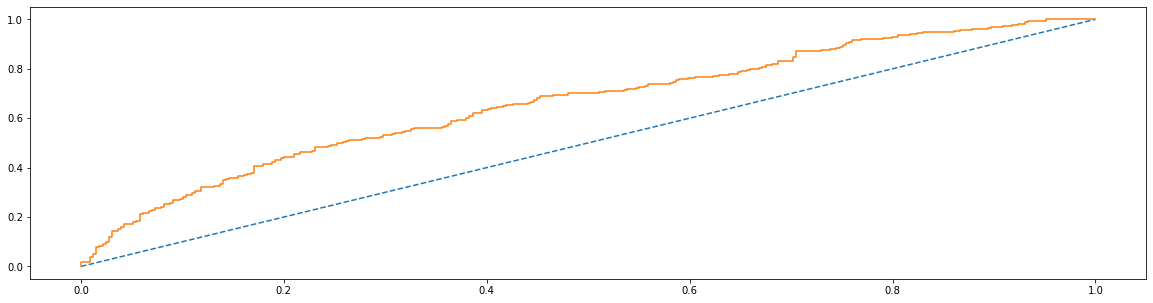

In [261]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [262]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6603053435114504

AUC: 0.661


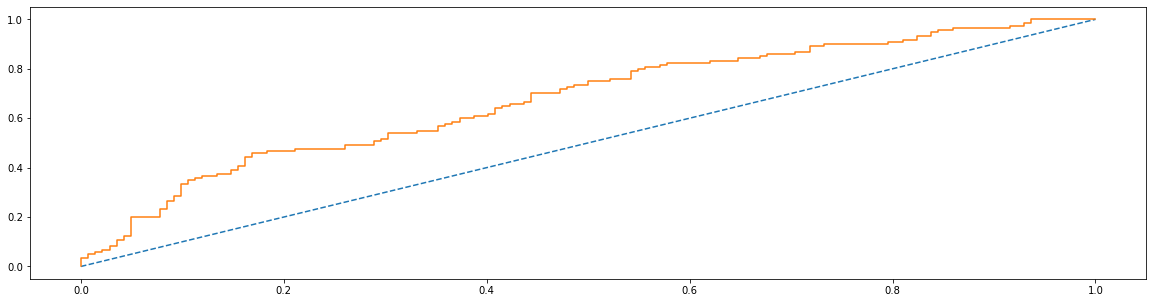

In [263]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [264]:
confusion_matrix(y_train, ytrain_predict)

array([[260,  69],
       [154, 127]], dtype=int64)

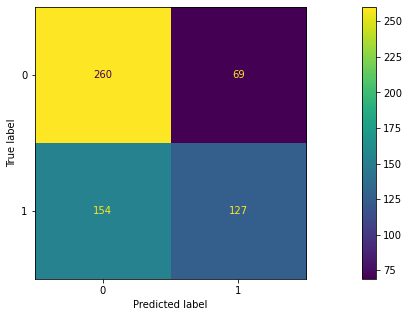

In [265]:
plot_confusion_matrix(model,X_train,y_train);

In [266]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70       329
           1       0.65      0.45      0.53       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.62       610
weighted avg       0.64      0.63      0.62       610



In [267]:
confusion_matrix(y_test, ytest_predict)

array([[118,  24],
       [ 65,  55]], dtype=int64)

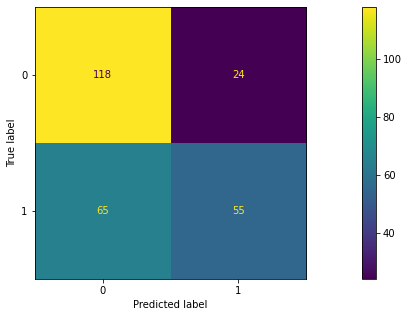

In [268]:
plot_confusion_matrix(model,X_test,y_test);

In [269]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.64      0.83      0.73       142
           1       0.70      0.46      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.64       262
weighted avg       0.67      0.66      0.65       262



##### Applying GridSearchCV for Logistic Regression

In [270]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [271]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [272]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [273]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [274]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [275]:
best_model = grid_search.best_estimator_

In [276]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [277]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.525615,0.474385
1,0.555461,0.444539
2,0.530491,0.469509
3,0.546037,0.453963
4,0.568739,0.431261


              precision    recall  f1-score   support

           0       0.54      1.00      0.70       329
           1       0.00      0.00      0.00       281

    accuracy                           0.54       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.54      0.38       610
 



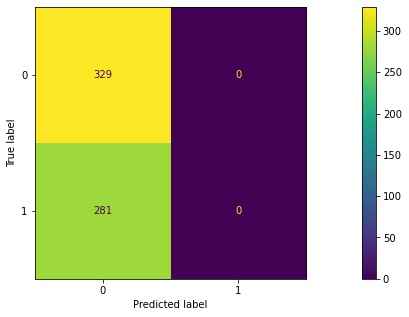

In [278]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       142
           1       0.00      0.00      0.00       120

    accuracy                           0.54       262
   macro avg       0.27      0.50      0.35       262
weighted avg       0.29      0.54      0.38       262
 



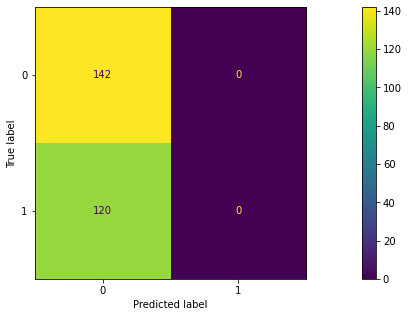

In [279]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

##### LDA Model

In [282]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [285]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [287]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)
pred_class_test

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=uint8)

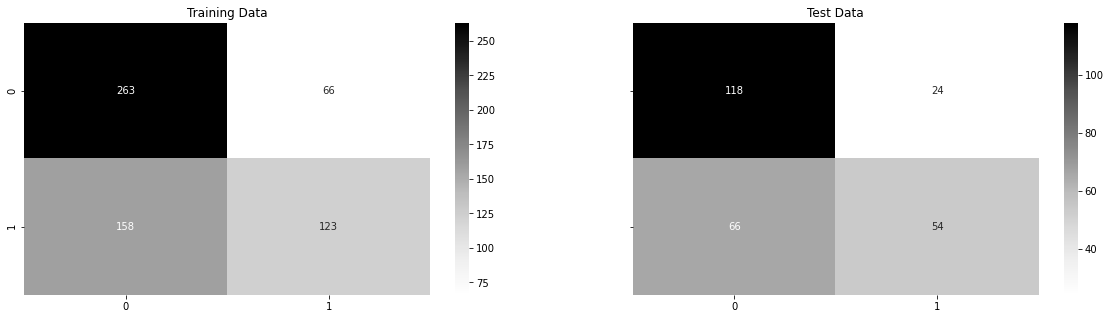

In [289]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [290]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.62      0.80      0.70       329
           1       0.65      0.44      0.52       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262
 



In [291]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [292]:
pred_prob_train[:,1]

array([0.73614833, 0.64936462, 0.45296681, 0.67842845, 0.66903745,
       0.3774365 , 0.32146187, 0.43700845, 0.3601507 , 0.62535644,
       0.23288822, 0.26149271, 0.44813877, 0.48143931, 0.29614015,
       0.46145671, 0.43653859, 0.30536315, 0.54175682, 0.66481517,
       0.49405489, 0.31531235, 0.75146336, 0.43228357, 0.31741838,
       0.74742033, 0.24732567, 0.7256214 , 0.49778025, 0.4701221 ,
       0.2458476 , 0.59535195, 0.39263888, 0.38905706, 0.34870239,
       0.34966751, 0.47524197, 0.50165433, 0.47132887, 0.20930823,
       0.22990207, 0.67104116, 0.40365647, 0.62197077, 0.64959972,
       0.34741408, 0.34082919, 0.73390632, 0.42023771, 0.62369484,
       0.57834131, 0.3978419 , 0.49066256, 0.40405466, 0.22000295,
       0.41866697, 0.25849518, 0.5276083 , 0.6674488 , 0.40702718,
       0.59934243, 0.26473066, 0.43421298, 0.34478906, 0.5114521 ,
       0.53275226, 0.41995444, 0.49835656, 0.40640466, 0.33834489,
       0.25698034, 0.65937394, 0.48721781, 0.25848244, 0.71797

AUC for the Training Data: 0.661
AUC for the Test Data: 0.675


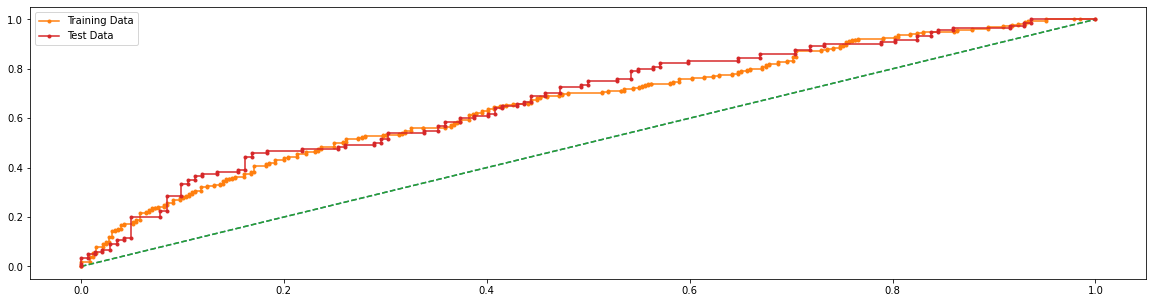

In [296]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

0.1 

Accuracy Score 0.4607
F1 Score 0.6308 

Confusion Matrix


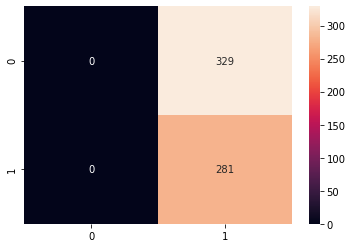

0.2 

Accuracy Score 0.4738
F1 Score 0.6365 

Confusion Matrix


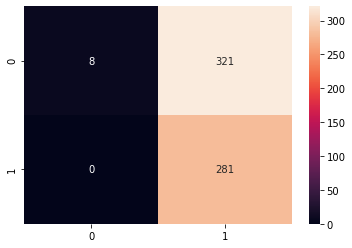

0.3 

Accuracy Score 0.5344
F1 Score 0.6485 

Confusion Matrix


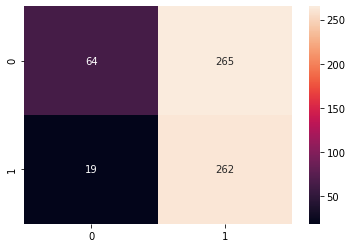

0.4 

Accuracy Score 0.5787
F1 Score 0.6088 

Confusion Matrix


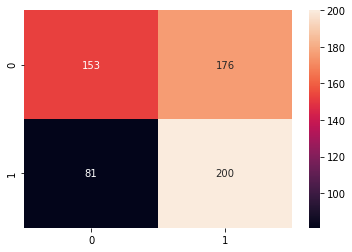

0.5 

Accuracy Score 0.6328
F1 Score 0.5234 

Confusion Matrix


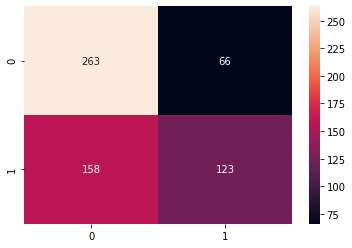

0.6 

Accuracy Score 0.6213
F1 Score 0.446 

Confusion Matrix


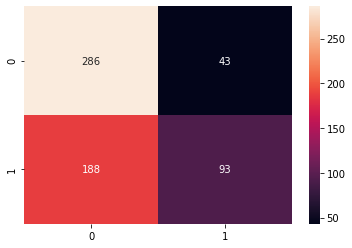

0.7 

Accuracy Score 0.5869
F1 Score 0.2455 

Confusion Matrix


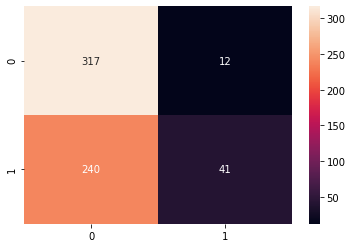

0.8 

Accuracy Score 0.541
F1 Score 0.0071 

Confusion Matrix


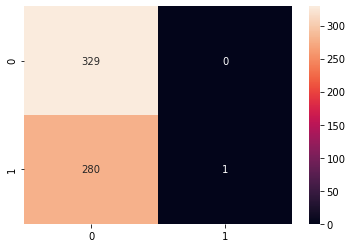

0.9 

Accuracy Score 0.5393
F1 Score 0.0 

Confusion Matrix


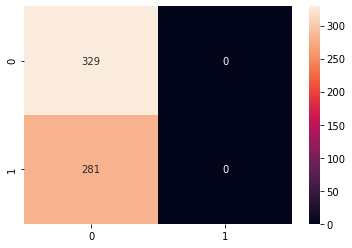

In [299]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [300]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.2:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

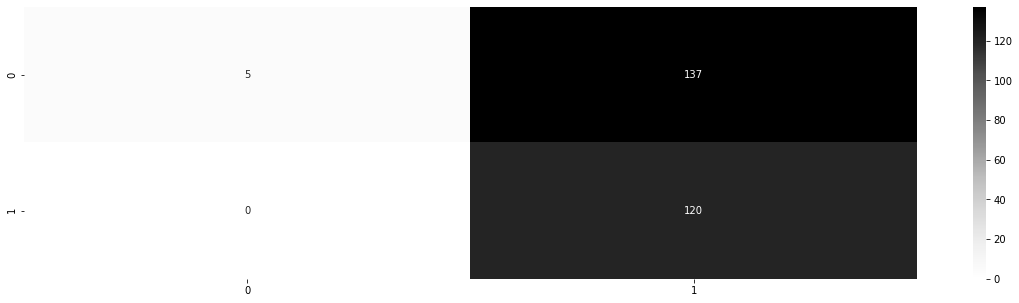

In [301]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [303]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       1.00      0.04      0.07       142
           1       0.47      1.00      0.64       120

    accuracy                           0.48       262
   macro avg       0.73      0.52      0.35       262
weighted avg       0.76      0.48      0.33       262
 

